# Separating classes with Logistic Regression

## Logistic Regression classifies

Linear regression makes a prediction: if `y = mx + b`. Logistic regression produces a probability, an estimate that `y` is either `0` or `1`.

Consider the following dataset:

In [1]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame()
data['x'] = np.array([3,0,5,2,1,0,0,5,6,4,1])
data['y'] = np.array([1,0,1,0,0,0,0,1,1,0,0])
print(data)

    x  y
0   3  1
1   0  0
2   5  1
3   2  0
4   1  0
5   0  0
6   0  0
7   5  1
8   6  1
9   4  0
10  1  0


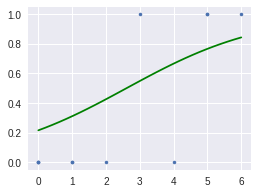

In [2]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(data['x'].values.reshape(-1,1),data['y'].ravel())
y_hat = regr.predict(data['x'].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(data['x'],data['y'],'.')

smooth_x = np.linspace(0,6,30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');

In the above, the blue dots are the samples, and the green is the line of probability predicted by the logistic regression. When the logistic regression estimate `p(x) < 0.5, `y = 0`. When `p(x) >= 0.5`, `y = 1`. The next graph shows the prediction of the estimator: 

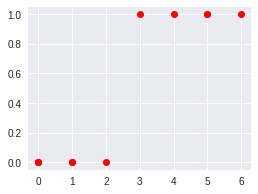

In [3]:
plt.figure(figsize=(4,3))
plt.plot(data['x'],regr.predict(data['x'].values.reshape(-1,1)),'or');

### Challenge

Load the Motor Trend cars dataset at `https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1` and use the `fit` and `predict` functions of `sklearn.linear_model.LogisticRegression` to predict the two binomial columns from that dataset: `vs` and `am`. You choose which feature columns to use.

### Stretch goal

After fitting the model to predict `vs` and `am` on your chosen features, duplicate the above code that draws the sigmoid prediction function using `smooth_x`, `coef_`, and `intercept_`.

In [4]:
# Solve the coding challenge here.

data = pd.read_csv('https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
def best_univariate_model(data, features, label):
    model = LogisticRegression()
    
    best_score = 0
    best_model = None
    best_feature = None
    for feature in features:
    
        X = data[feature].values.reshape(-1, 1)
        model.fit(X, data[label])
    
        score = model.score(X, data[label])
        if score > best_score:
            best_score = score
            best_model = model
            best_feature = feature
            
    return best_model, best_feature

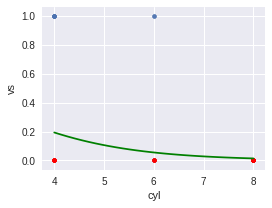

In [6]:
features = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'gear', 'carb']

model_vs, feature = best_univariate_model(data, features, 'vs')

X = data[feature].values.reshape(-1, 1)

y_hat = model_vs.predict(X)

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(X, data['vs'], s=15, alpha=0.5)
ax.set(xlabel=feature, ylabel='vs')

smooth_x = np.linspace(X.min(),X.max(),30)
p = model_vs.coef_[0]*smooth_x + model_vs.intercept_
p = 1/(1+np.exp(-p))
ax.plot(smooth_x, p, 'g')
ax.scatter(X, y_hat, s=15, alpha=0.5, color='red');

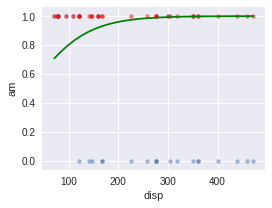

In [7]:
model_am, feature = best_univariate_model(data, features, 'am')

X = data[feature].values.reshape(-1, 1)

y_hat = model_am.predict(X)

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(X, data['am'], s=15, alpha=0.5)
ax.set(xlabel=feature, ylabel='am')

smooth_x = np.linspace(X.min(),X.max(),30)
p = model_am.coef_[0]*smooth_x + model_am.intercept_
p = 1/(1+np.exp(-p))
ax.plot(smooth_x, p, 'g')
ax.scatter(X, y_hat, s=15, alpha=0.5, color='red');